# Import Libraries and Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
food = pd.read_csv(r'.\u_food_marketing.csv')

food

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


# Data Cleaning

#### Check for duplicates and drop those rows

In [3]:
food[food.duplicated()].count()   #Gives the number of duplicate rows

Income                  184
Kidhome                 184
Teenhome                184
Recency                 184
MntWines                184
MntFruits               184
MntMeatProducts         184
MntFishProducts         184
MntSweetProducts        184
MntGoldProds            184
NumDealsPurchases       184
NumWebPurchases         184
NumCatalogPurchases     184
NumStorePurchases       184
NumWebVisitsMonth       184
AcceptedCmp3            184
AcceptedCmp4            184
AcceptedCmp5            184
AcceptedCmp1            184
AcceptedCmp2            184
Complain                184
Z_CostContact           184
Z_Revenue               184
Response                184
Age                     184
Customer_Days           184
marital_Divorced        184
marital_Married         184
marital_Single          184
marital_Together        184
marital_Widow           184
education_2n Cycle      184
education_Basic         184
education_Graduation    184
education_Master        184
education_PhD       

In [4]:
food.drop_duplicates(keep= False, inplace = True)

In [26]:
#food.info()

#### Cleaning Columns

In [5]:
food['Total_Children'] = food[['Kidhome', 'Teenhome']].sum(axis= 1)

In [6]:
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5, 0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4, 0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3, 0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2, 0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1, 0:0})

food['Marital_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis= 1)
food['Marital_Status_str'] = food['Marital_Status'].map({5: 'Divorced', 4: 'Married', 3: 'Single', 2: 'Together', 1: 'Widow'})

In [7]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1, 0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2, 0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3, 0:0})
food['education_Master'] = food['education_Master'].replace({1:4, 0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5, 0:0})

food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis= 1)
food['Education_Status_str'] = food['Education_Status'].map({5: 'Doctorate', 4: 'Master', 3: 'Bachelor', 2: 'High School', 1: 'Non-High School'})

In [8]:
food['Accepted_Campaigns'] = food[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2', 'AcceptedCmp1', 'Response']].sum(axis= 1)
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)                        

#Did they accept a campaign? Yes (1), No (0)


# Data Exploration

#### Correlations

In [9]:
food.corr(method= 'pearson', numeric_only= True)['Accepted_Campaigns'].sort_values(ascending= False)

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.713352
Response                0.685109
AcceptedCmp4            0.465985
AcceptedCmp3            0.453742
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
MntWines                0.416651
MntTotal                0.393910
MntRegularProds         0.391931
NumCatalogPurchases     0.322143
MntMeatProducts         0.298240
Income                  0.292812
NumWebPurchases         0.221217
MntGoldProds            0.188209
AcceptedCmp2            0.174619
MntSweetProducts        0.156430
MntFruits               0.149973
MntFishProducts         0.145404
NumStorePurchases       0.144965
Customer_Days           0.083874
Education_Status        0.062534
marital_Single          0.051947
education_PhD           0.043488
marital_Widow           0.038379
Age                     0.013540
education_Master        0.012535
marital_Divorced        0.002049
education_Graduation   -0.006359
Marital_Status         -0.021551
marital_To

<Axes: >

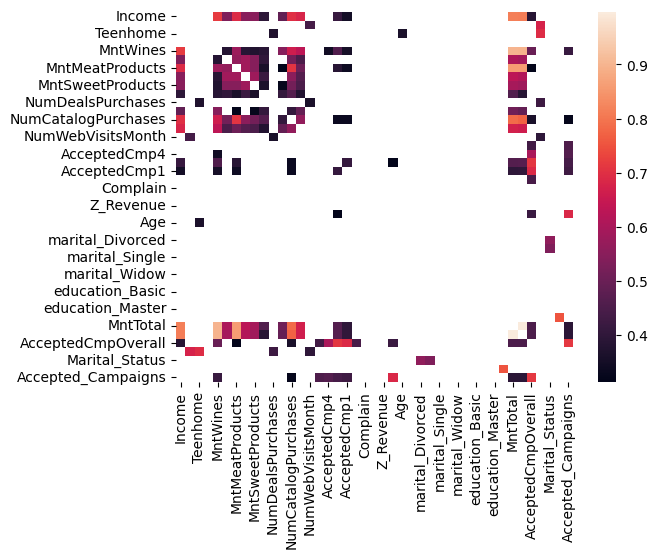

In [10]:
all_corr = food.corr(method= 'pearson', numeric_only= True)
all_corr = all_corr[(all_corr > 0.3) & (all_corr < 1)]

sns.heatmap(all_corr)

In [11]:
all_corr['Accepted_Campaigns']

Income                       NaN
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.416651
MntFruits                    NaN
MntMeatProducts              NaN
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumCatalogPurchases     0.322143
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp3            0.453742
AcceptedCmp4            0.465985
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
AcceptedCmp2                 NaN
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.685109
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Married              NaN
marital_Single               NaN
marital_Together             NaN
marital_Wi

#### Create Age Groups

In [15]:
age_groups = [(23, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 85)]
age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 85']

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f'{age_range[0]} - {age_range[1]}'
    return ('Unkown')

food['Age_Group'] = food['Age'].apply(assign_age_group)

<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

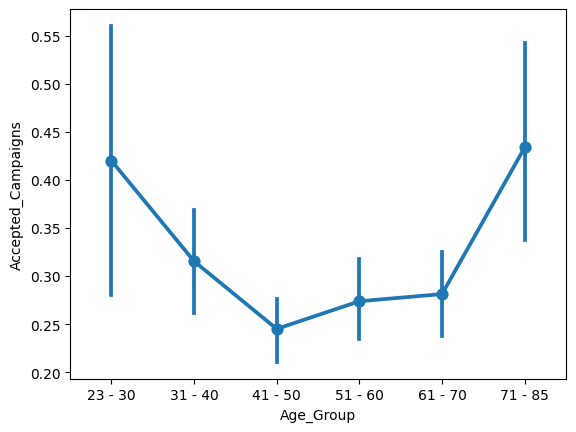

In [16]:
sns.pointplot(data= food, x = 'Age_Group', y = 'Accepted_Campaigns', order= age_order)

#### Exploring Age Groups

In [17]:
age_counts = food['Age_Group'].value_counts()
age_percent = age_counts / food.shape[0]

In [18]:
percent_food = age_percent.reset_index()
percent_food.columns = ['age_group', 'percentage']
percent_food.sort_values('age_group')


,age_group,percentage
5,23 - 30,0.027130
3,31 - 40,0.161693
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
4,71 - 85,0.045035


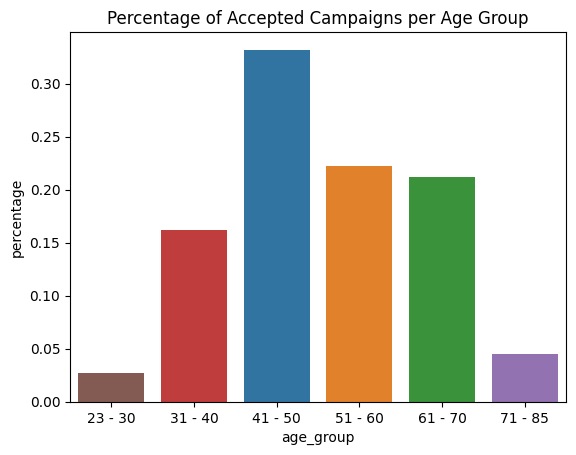

In [27]:
sns.barplot(x = 'age_group', y = 'percentage', hue= 'age_group', data= percent_food, order= age_order)

plt.title('Percentage of Accepted Campaigns per Age Group')
plt.show()

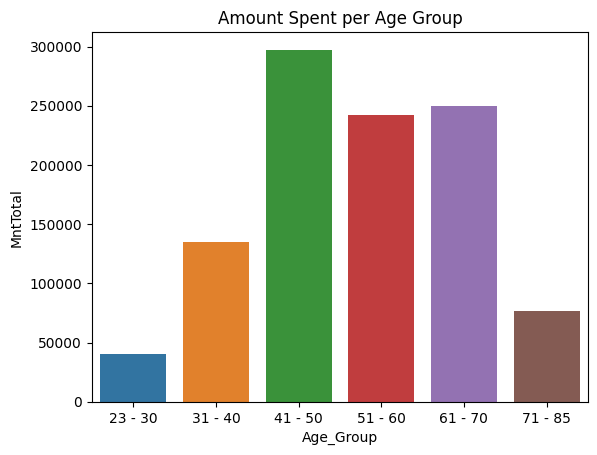

In [28]:
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Age_Group', y = 'MntTotal', hue= 'Age_Group', data= grouped_food)

plt.title('Amount Spent per Age Group')
plt.show()

##### Filter more to show how much is being spent by each age group for those that accepted campaigns

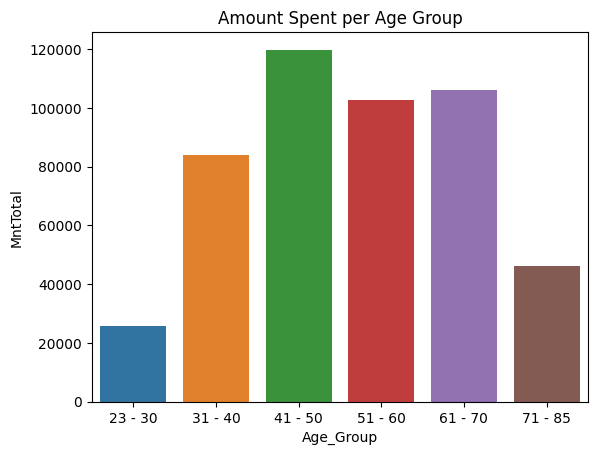

In [30]:
acccept_camp = food[food['Accepted_Campaigns'] != 0]

grouped_food = acccept_camp.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(x = 'Age_Group', y = 'MntTotal', hue= 'Age_Group', data= grouped_food)

plt.title('Amount Spent per Age Group')
plt.show()

##### Age Segmentation - Core audience for accepting campaigns right now is 31-70 year olds. The groups of 23-30 and 71-85 are accepting at higher rates.

## Where are the people making purchases?

In [40]:
sum_food = pd.DataFrame(food[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['Sums']).reset_index()
sum_food.rename(columns = {'index': 'Type_of_Purchase'}, inplace = True)

sum_food

,Type_of_Purchase,Sums
0,NumWebPurchases,7619
1,NumCatalogPurchases,4871
2,NumStorePurchases,10675


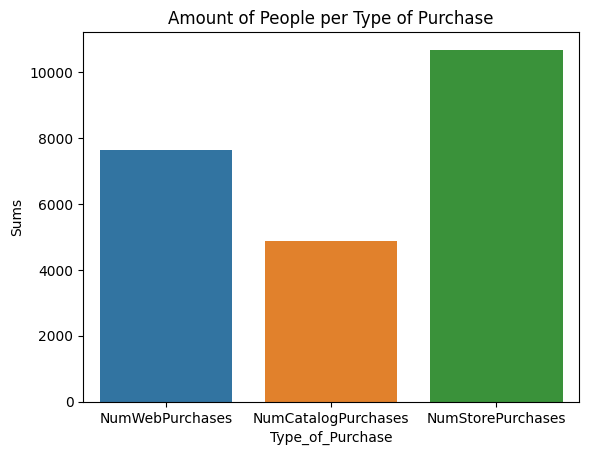

In [43]:
sns.barplot(x = 'Type_of_Purchase', y = 'Sums', hue = 'Type_of_Purchase' , data = sum_food)

plt.title('Amount of People per Type of Purchase')
plt.show()

#### Now filter for the people that accepted campaigns

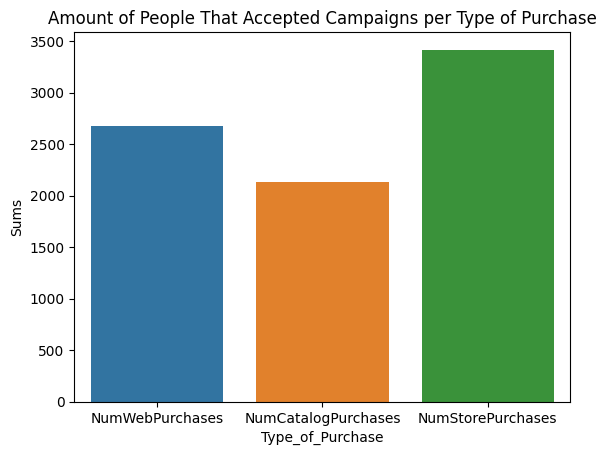

In [45]:
acccept_camp = food[food['Accepted_Campaigns'] != 0]

sum_food = pd.DataFrame(acccept_camp[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['Sums']).reset_index()
sum_food.rename(columns = {'index': 'Type_of_Purchase'}, inplace = True)


sns.barplot(x = 'Type_of_Purchase', y = 'Sums', hue = 'Type_of_Purchase' , data = sum_food)

plt.title('Amount of People That Accepted Campaigns per Type of Purchase')
plt.show()

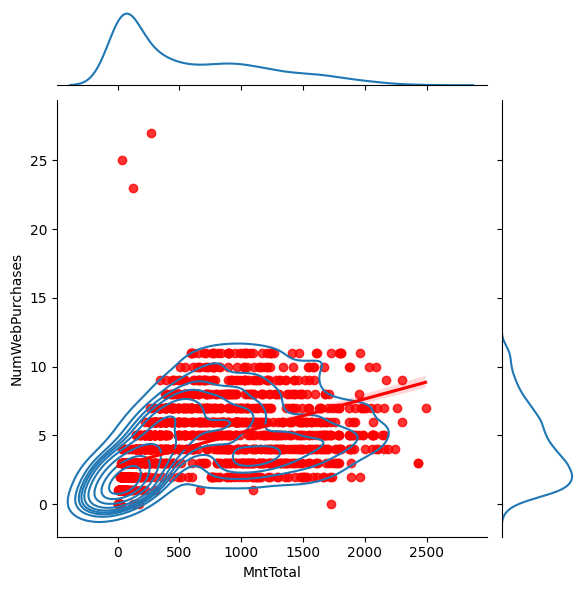

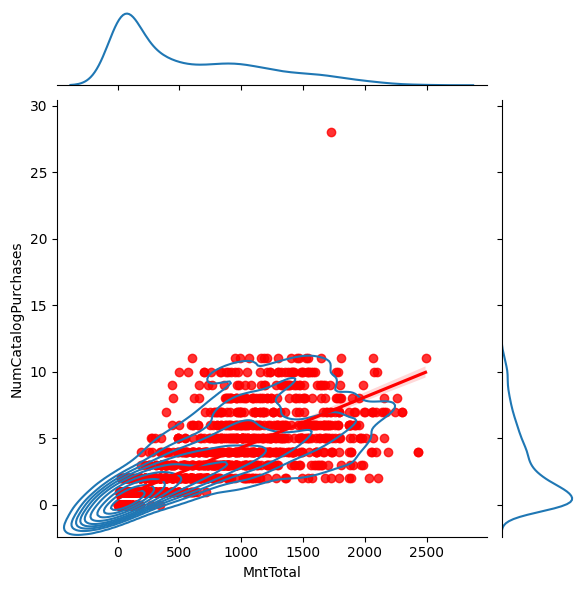

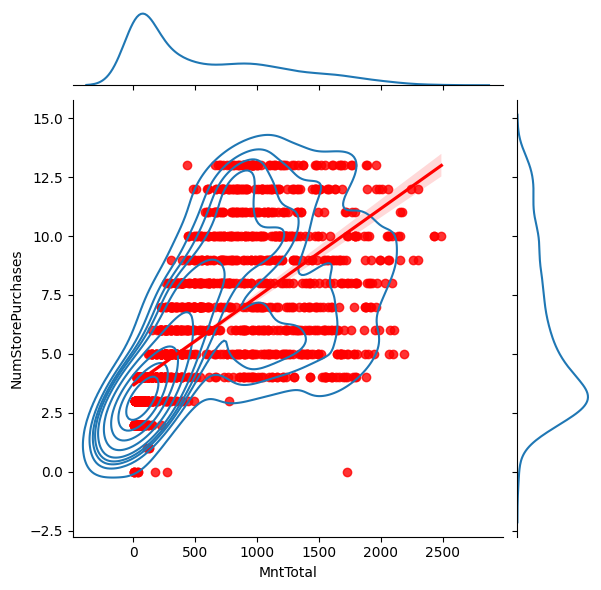

In [53]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = 'kde')
y = sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = 'kde')
z = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = 'kde')

x.plot_joint(sns.regplot, color = 'r')
y.plot_joint(sns.regplot, color = 'r')
z.plot_joint(sns.regplot, color = 'r')

plt.show()

##### We see a positive correlation between the total amount spent and the number of web purchases. Most people are purchasing between 0 and 5, while spending between 0 and 500 total. There is also a positive correlation between the total amount spent and the number of catalog purchases, but with most number of purchases is between 0 and 3 and the total amount spent is between 0 and 300. The number of store purchases and the total amount spent has a more positive correlation, with most number of purchaes is between 2 and 5 and the total amount spent is between 0 and 500.

##### We can take this in 2 directions: Boost up the higher percentage catalog customers or focus on In Store/Web because they have more traffic.

## Exploring correlation between number of children and accepted campaigns

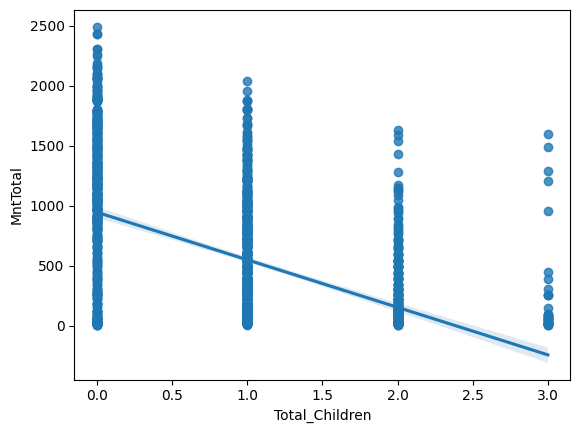

In [57]:
sns.regplot(x = 'Total_Children', y = 'MntTotal', data = food)

plt.show()

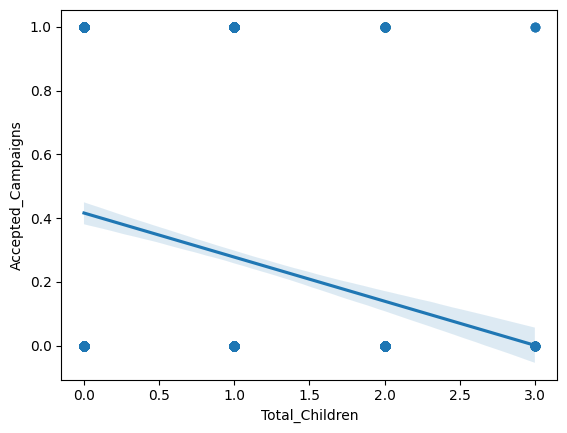

In [58]:
sns.regplot(x = 'Total_Children', y = 'Accepted_Campaigns', data = food)

plt.show()

##### People having less kids tend to spend more money and more likely to accept campaigns at a higher rate

## Does education status or marriage status play a significant role?

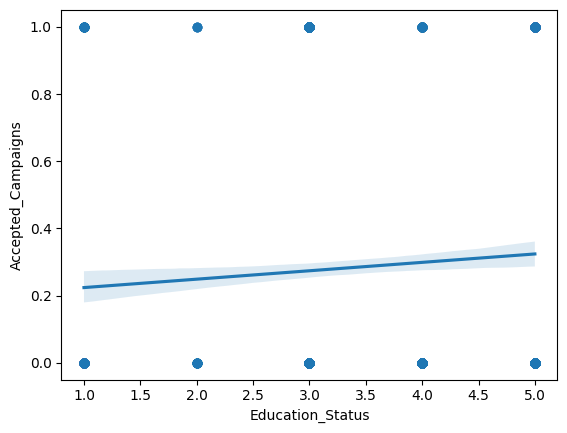

In [62]:
sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = food)

plt.show()

##### It seems that education status does not play a significant role in whether or not someone accepts campaigns

In [78]:
food['Marital_Status_str'].value_counts()

Marital_Status_str
Married     720
Together    451
Single      409
Divorced    199
Widow        64
Name: count, dtype: int64

In [79]:
acccept_camp = food[food['Accepted_Campaigns'] != 0]

rel_food = acccept_camp.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()

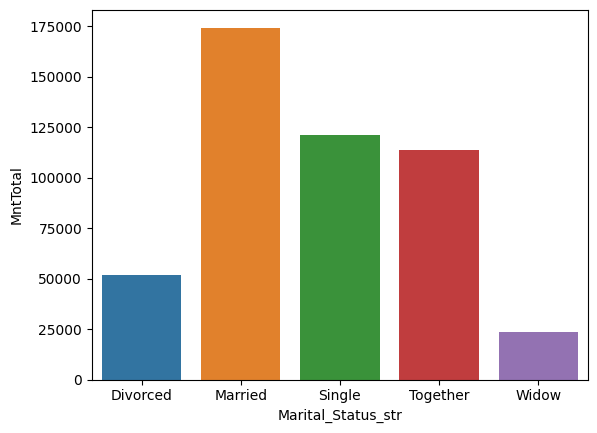

In [80]:
sns.barplot(x = 'Marital_Status_str', y = 'MntTotal', hue = 'Marital_Status_str', data = rel_food)

plt.show()

In [82]:
total = food['Marital_Status_str'].value_counts()
accepted = food[food['Accepted_Campaigns'] == 1]['Marital_Status_str'].value_counts()

In [85]:
prct_marital = accepted/total * 100
prct_food = prct_marital.reset_index()

prct_food.columns = ['Marital_Status', 'Percentage']

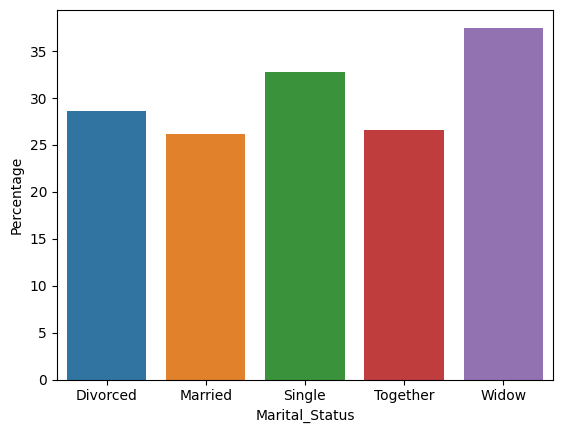

In [87]:
sns.barplot(x = 'Marital_Status', y = 'Percentage', hue = 'Marital_Status', data = prct_food)

plt.show()

##### Married, single and together categories are spending a lot more money. We should focus on those 3 groups.

# Overall findings:
### 1. Age 30-70 were spending more money, but less likely to accept campaigns. These age groups had the highest volume, as well.
### 2. Catalog was more likely to accept campaigns, but in-person and web purchasers spend more money. I would recommend a split between them all:
- 40% Catalog, 30% Web, 30% In-Store
### 3. Focus on people with no kids or less kids, because they tend to spend more.
### 4. Education status has little to no impact, so we do not need to target any group.
### 5. Marital Status does not play a huge part, but 'Married', 'Single', and 'Together' spend more money

# Profit Increase Recommendation:
### Middle aged people, high earners, with no kids. We want to target on different platforms as stated above (#2)

# Gather New Users to Spend Money Recommendation:
### Focus on 21-30, 70 and up. These age groups statistically accepted campaigns at a higher rate than middle aged people.